In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy

from sklearn.metrics import RocCurveDisplay
from sklearn import metrics


# Wilcoxon

In [58]:
def wilcoxon(arr1, arr2):
    """Perform the Wilcoxon signed-rank test on paired samples.

    The Wilcoxon signed-rank test is a non-parametric statistical hypothesis test
    used to assess whether two paired samples come from the same distribution.

    Args:
        arr1 (np.array): The first array of paired samples
        arr2 (np.array): The second array of paired samples
    """
    # Calculating differences between two paired samples
    stats_for_bucket = pd.DataFrame(data={"arr1":arr1.values, "arr2":arr2.values})
    stats_for_bucket["diff"] = stats_for_bucket.arr1 - stats_for_bucket.arr2 
    
    # Removal of paired observations 
    stats_for_bucket = stats_for_bucket[stats_for_bucket["diff"]!=0]  
    
    # Calculation of signed-rank
    stats_for_bucket["abs"] = np.abs(stats_for_bucket["diff"]) 
    stats_for_bucket["sign"] = stats_for_bucket["diff"]/np.abs(stats_for_bucket["diff"]) 
    stats_for_bucket["signed_rank"] = stats_for_bucket["abs"].rank().astype(int) * stats_for_bucket["sign"] 
    
    # Test statistic
    W = np.min(stats_for_bucket.groupby("sign").sum()["signed_rank"]) 

    # Handling of Ties
    ties = stats_for_bucket.groupby("abs").count().iloc[:,0]
    N = len(stats_for_bucket)
    s = np.sqrt((N * (N-1) * (2*N+1) - np.sum(ties**3-ties)/2)/6)

    # Calculating p-values
    one_sided = stats.norm.cdf(W/s, 0, 1)
    two_sided = stats.norm.cdf(2*(1-np.abs(W/s)), 0, 1)
        
    print(f"Wilcoxon:\nOne sided: {one_sided}\nTwo sided: {two_sided}\n")

In [59]:
# Sample size for all experiments
n = 5000

# Calibrated model

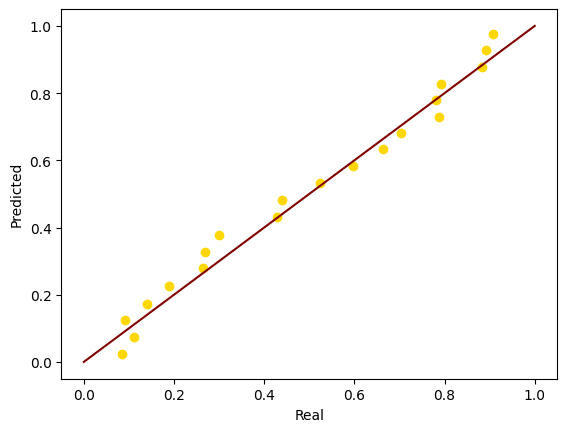

Wilcoxon:
One sided: 0.08176182515585723
Two sided: 0.21574749032157714

Wilcoxon scipy:
One sided: 0.8987751007080078
Two sided: 0.087431435580598

T-test scipy:
One sided: 0.9121064677051851
Two sided: 0.17578706458962978

MSE: 0.0016190357448918815


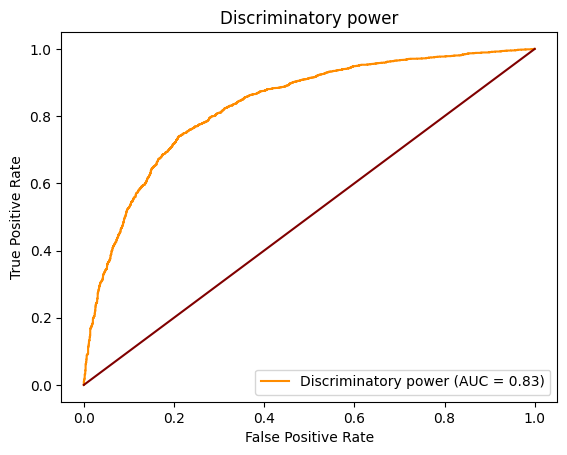

In [60]:
# Sample generation
prob = np.random.uniform(0,1,n)
y = ((prob + np.random.normal(0,1/3,n))>1/2).astype(int)

# Bucketting based on predicted probabilities
df = pd.DataFrame(data={"predicted": prob, "real": y})
df["bucket"] = 0
for j in range(1,20):
    less_range = np.quantile(df.predicted,j/20)
    df["bucket"] = [df.bucket[j]+1 if df["predicted"][j]>less_range else df.bucket[j] for j in range(len(df.bucket))]
stats_for_bucket = df.groupby('bucket').mean()

# Plot realised vs observed probabilities
plt.plot([0,1],[0,1], color="maroon")
plt.scatter(stats_for_bucket.real, stats_for_bucket.predicted, color="gold")
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.show()


# Statistical test

## Wilcoxon-signed rank
wilcoxon(stats_for_bucket.predicted, stats_for_bucket.real)
print(f"Wilcoxon scipy:\nOne sided: {scipy.stats.wilcoxon(stats_for_bucket.predicted, stats_for_bucket.real, alternative='less')[1]}\nTwo sided: {scipy.stats.wilcoxon(prob, y)[1]}\n")

## T-test
print(f"T-test scipy:\nOne sided: {scipy.stats.ttest_ind(prob, y, alternative='less')[1]}\nTwo sided: {scipy.stats.ttest_ind(prob, y)[1]}\n")

# Mean squared error
print(f"MSE: {np.mean((stats_for_bucket.predicted-stats_for_bucket.real)**2)}")

# ROC
display = RocCurveDisplay.from_predictions(
    y,
    prob,
    name=f"Discriminatory power",
    color="darkorange",
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Discriminatory power",
)
plt.plot([0,1],[0,1], color="maroon")
plt.show()

# Model biased favoring class 0

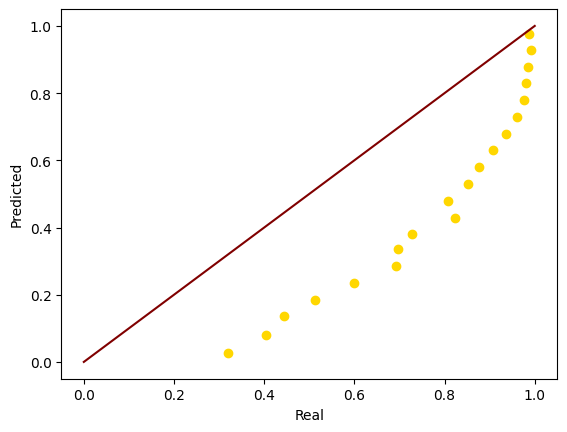

Wilcoxon:
One sided: 1.8854907064067638e-05
Two sided: 2.1578069932337026e-10

Wilcoxon scipy:
One sided: 9.5367431640625e-07
Two sided: 0.0

T-test scipy:
One sided: 1.5625364549969673e-287
Two sided: 3.1250729099939346e-287

MSE: 0.08372467383177054


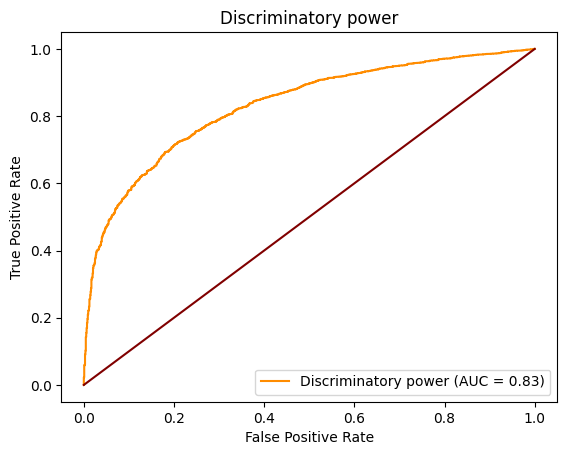

In [61]:
# Sample generation
prob = np.random.uniform(0,1,n)
y = ((prob + np.random.normal(1/3,1/3,n))>1/2).astype(int)

# Bucketting based on predicted probabilities
df = pd.DataFrame(data={"predicted": prob, "real": y})
df["bucket"] = 0
for j in range(1,20):
    less_range = np.quantile(df.predicted,j/20)
    df["bucket"] = [df.bucket[j]+1 if df["predicted"][j]>less_range else df.bucket[j] for j in range(len(df.bucket))]
stats_for_bucket = df.groupby('bucket').mean()

# Plot realised vs observed probabilities
plt.plot([0,1],[0,1], color="maroon")
plt.scatter(stats_for_bucket.real, stats_for_bucket.predicted, color="gold")
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.show()


# Statistical test

## Wilcoxon-signed rank
wilcoxon(stats_for_bucket.predicted, stats_for_bucket.real)
print(f"Wilcoxon scipy:\nOne sided: {scipy.stats.wilcoxon(stats_for_bucket.predicted, stats_for_bucket.real, alternative='less')[1]}\nTwo sided: {scipy.stats.wilcoxon(prob, y)[1]}\n")

## T-test
print(f"T-test scipy:\nOne sided: {scipy.stats.ttest_ind(prob, y, alternative='less')[1]}\nTwo sided: {scipy.stats.ttest_ind(prob, y)[1]}\n")

# Mean squared error
print(f"MSE: {np.mean((stats_for_bucket.predicted-stats_for_bucket.real)**2)}")

# ROC
display = RocCurveDisplay.from_predictions(
    y,
    prob,
    name=f"Discriminatory power",
    color="darkorange",
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Discriminatory power",
)
plt.plot([0,1],[0,1], color="maroon")
plt.show()

# # Model biased favoring class 1

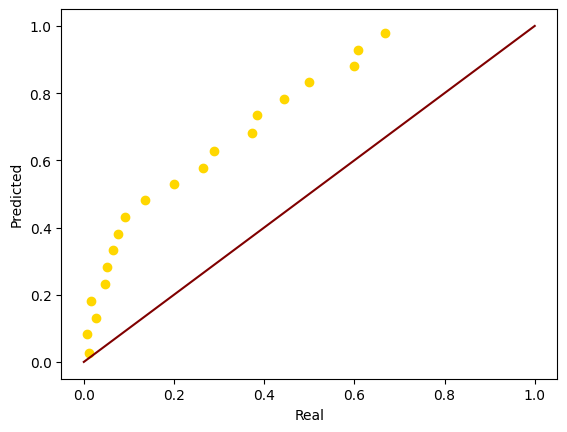

Wilcoxon:
One sided: 0.9999811450929359
Two sided: 2.1578069932337026e-10

Wilcoxon scipy:
One sided: 1.0
Two sided: 0.0

T-test scipy:
One sided: 1.0
Two sided: 1.5314670297521611e-266

MSE: 0.07884922982079859


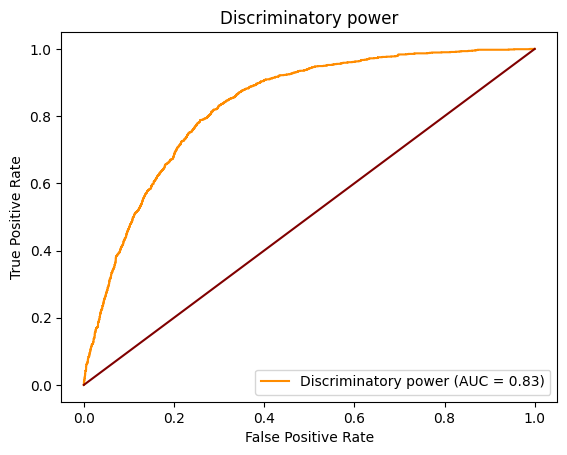

In [62]:
# Sample generation
prob = np.random.uniform(0,1,n)
y = ((prob + np.random.normal(-1/3,1/3,n))>1/2).astype(int)

# Bucketting based on predicted probabilities
df = pd.DataFrame(data={"predicted": prob, "real": y})
df["bucket"] = 0
for j in range(1,20):
    less_range = np.quantile(df.predicted,j/20)
    df["bucket"] = [df.bucket[j]+1 if df["predicted"][j]>less_range else df.bucket[j] for j in range(len(df.bucket))]
stats_for_bucket = df.groupby('bucket').mean()

# Plot realised vs observed probabilities
plt.plot([0,1],[0,1], color="maroon")
plt.scatter(stats_for_bucket.real, stats_for_bucket.predicted, color="gold")
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.show()


# Statistical test

## Wilcoxon-signed rank
wilcoxon(stats_for_bucket.predicted, stats_for_bucket.real)
print(f"Wilcoxon scipy:\nOne sided: {scipy.stats.wilcoxon(stats_for_bucket.predicted, stats_for_bucket.real, alternative='less')[1]}\nTwo sided: {scipy.stats.wilcoxon(prob, y)[1]}\n")

## T-test
print(f"T-test scipy:\nOne sided: {scipy.stats.ttest_ind(prob, y, alternative='less')[1]}\nTwo sided: {scipy.stats.ttest_ind(prob, y)[1]}\n")

# Mean squared error
print(f"MSE: {np.mean((stats_for_bucket.predicted-stats_for_bucket.real)**2)}")

# ROC
display = RocCurveDisplay.from_predictions(
    y,
    prob,
    name=f"Discriminatory power",
    color="darkorange",
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Discriminatory power",
)
plt.plot([0,1],[0,1], color="maroon")
plt.show()

# Overfitted model

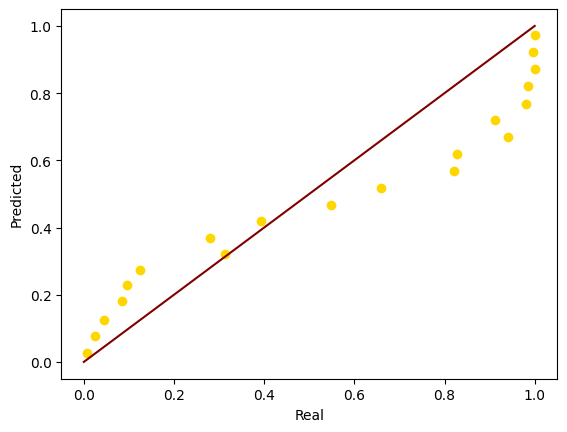

Wilcoxon:
One sided: 0.002084172062685018
Two sided: 9.563902311804697e-05

Wilcoxon scipy:
One sided: 0.06636333465576172
Two sided: 9.537086730157587e-26

T-test scipy:
One sided: 8.07050645744074e-12
Two sided: 1.614101291488148e-11

MSE: 0.020388143049157002


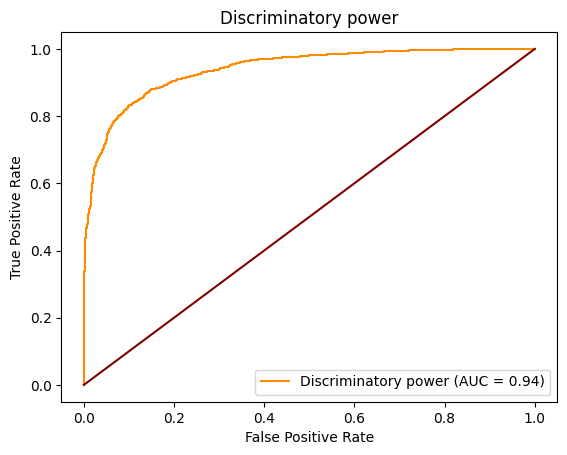

In [63]:
# Sample generation
prob = np.random.uniform(0,1,n)
y = ((prob + np.random.normal(prob-2/5,1/3,n))>1/2).astype(int)

# Bucketting based on predicted probabilities
df = pd.DataFrame(data={"predicted": prob, "real": y})
df["bucket"] = 0
for j in range(1,20):
    less_range = np.quantile(df.predicted,j/20)
    df["bucket"] = [df.bucket[j]+1 if df["predicted"][j]>less_range else df.bucket[j] for j in range(len(df.bucket))]
stats_for_bucket = df.groupby('bucket').mean()

# Plot realised vs observed probabilities
plt.plot([0,1],[0,1], color="maroon")
plt.scatter(stats_for_bucket.real, stats_for_bucket.predicted, color="gold")
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.show()


# Statistical test

## Wilcoxon-signed rank
wilcoxon(stats_for_bucket.predicted, stats_for_bucket.real)
print(f"Wilcoxon scipy:\nOne sided: {scipy.stats.wilcoxon(stats_for_bucket.predicted, stats_for_bucket.real, alternative='less')[1]}\nTwo sided: {scipy.stats.wilcoxon(prob, y)[1]}\n")

## T-test
print(f"T-test scipy:\nOne sided: {scipy.stats.ttest_ind(prob, y, alternative='less')[1]}\nTwo sided: {scipy.stats.ttest_ind(prob, y)[1]}\n")

# Mean squared error
print(f"MSE: {np.mean((stats_for_bucket.predicted-stats_for_bucket.real)**2)}")

# ROC
display = RocCurveDisplay.from_predictions(
    y,
    prob,
    name=f"Discriminatory power",
    color="darkorange",
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Discriminatory power",
)
plt.plot([0,1],[0,1], color="maroon")
plt.show()

In [64]:
# Last model has highest discriminatory power this is probably why neural networks are uncalibrated models because they focus on discriminatory power
# Try focal loss